In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Spill_Incidents.csv')

### Finding Which Locations Had The Most Spills

In [3]:
# get rid of unnecessary columns and change units to all be gallons
location_data = data.loc[:, ['Locality', 'County', 'Quantity', 'Units']].copy()
location_data.loc[location_data['Units'] == 'Pounds', 'Quantity'] = location_data.loc[location_data['Units'] == 'Pounds', 'Quantity'] / 7.21
location_data.loc[location_data['Units'] == 'Pounds', ['Units']] = 'Gallons'

,Locality,County,Quantity,Units
0,ELMSFORD,Westchester,10.0,Gallons
1,QUEENS,Queens,0.0,Gallons
2,QUEENS,Queens,0.0,NaN
3,BRONX,Bronx,1.0,Gallons
4,LIBERTY,Sullivan,6.0,Gallons


In [4]:
# get total oil spilled by each locality and county
location_total = location_data.copy()
location_total['Total Spilled'] = location_total.groupby(['Locality', 'County'])['Quantity'].transform('sum')
location_total = location_total.drop(['Quantity', 'Units'], axis='columns')
location_total = location_total.drop_duplicates(subset=['Locality', 'County'])

# clean up total spilled by droping NaN values, sorting, and renaming column
location_total = location_total.dropna(subset=['Total Spilled'])
location_total = location_total.sort_values(['Total Spilled'], ascending=False)
location_total = location_total.rename(columns={'Total Spilled': 'Total Spilled (Gallons)'})
location_total = location_total.reset_index()
location_total = location_total.drop(['index'], axis='columns')
location_total.head(10)

,Locality,County,Total Spilled (Gallons)
0,COLONIE COHOES LATHAM WATERFOR,Albany,1.386963e+10
1,BALDWINSVILLE,Onondaga,2.004097e+08
2,BRONX,Bronx,1.537126e+08
3,NEW YORK CITY,Queens,1.039593e+08
4,EAST SYRACUSE,Onondaga,1.000680e+08
5,JAMAICA,Queens,6.401900e+07
6,YONKERS,Westchester,4.300818e+07
7,BROOKLYN,Kings,3.395350e+07
8,OSWEGO,Oswego,1.706309e+07
9,NEW ROCHELLE,Westchester,1.591020e+07


In [5]:
# another sub-data set that tracks frequency of spills instead of total gallons
location_freq = pd.DataFrame(location_data[['Locality', 'County']].value_counts())
location_freq = location_freq.reset_index()
location_freq.head(10)

,Locality,County,count
0,BROOKLYN,Kings,21649
1,MANHATTAN,New York,15279
2,BRONX,Bronx,13128
3,QUEENS,Queens,11214
4,ROCHESTER,Monroe,9047
5,BUFFALO,Erie,7240
6,STATEN ISLAND,Richmond,6590
7,YONKERS,Westchester,5608
8,WHITE PLAINS,Westchester,4783
9,SYRACUSE,Onondaga,4657


In [6]:
# only use top 75% of values that have quantity > 0
top_location_freq = location_data.copy()
top_location_freq = top_location_freq[top_location_freq['Quantity'] != 0]
top_location_freq = top_location_freq.sort_values(['Quantity'], ascending=False)
top_location_freq = top_location_freq.reset_index()
top_location_freq = top_location_freq.drop(['index'], axis='columns')
top_location_freq = top_location_freq.head(3* (top_location_freq.shape[0] // 4))

# frequency of top 75% oil spills
top_location_freq = pd.DataFrame(top_location_freq[['Locality', 'County']].value_counts())
top_location_freq = top_location_freq.reset_index()
top_location_freq.head(10)

,Locality,County,count
0,MANHATTAN,New York,7040
1,BROOKLYN,Kings,6753
2,BRONX,Bronx,4816
3,QUEENS,Queens,4528
4,ROCHESTER,Monroe,3671
5,BUFFALO,Erie,2256
6,SYRACUSE,Onondaga,1881
7,STATEN ISLAND,Richmond,1817
8,JAMAICA,Queens,1791
9,WHITE PLAINS,Westchester,1625


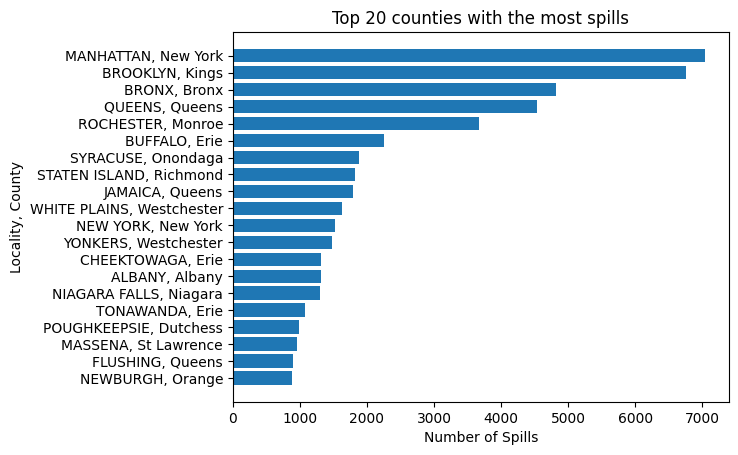

In [28]:
x = (top_location_freq['Locality'][0:20] + ', ' + top_location_freq['County'][0:20]).loc[::-1]
y = top_location_freq['count'][0:20].loc[::-1]
plt.barh(x,y)
plt.ylabel("Locality, County")
plt.xlabel("Number of Spills")
plt.title("Top 20 counties with the most spills")
plt.show()

### Find What Factors Contribute The Most To Spills

In [7]:
# Data Cleaning and Modification
# Remove records with missing 'Units'
clean_data = data.dropna(subset=['Units']).copy()

# Combine "Unknown" and "Other" into "Unknown"
clean_data['Contributing Factor'] = clean_data['Contributing Factor'].replace(['Other'], 'Unknown')

# compute sum and average
data_cleaned = clean_data.groupby(['Contributing Factor', 'Units'])['Quantity'].sum().reset_index()
avg_data_cleaned = clean_data.groupby(['Contributing Factor', 'Units'])['Quantity'].mean().reset_index()

# Filter data for gallons only
gallons_data_cleaned = data_cleaned[data_cleaned['Units'] == 'Gallons']
gallons_average_data_cleaned = avg_data_cleaned[avg_data_cleaned['Units'] == 'Gallons']

# create plots for total quantities
def create_plot(data, title_prefix='Top'):
    data_sorted = data.sort_values(by='Quantity', ascending=False).head(10)  # Show top 10 
    factors = data_sorted['Contributing Factor']
    quantities = data_sorted['Quantity']
    
    plt.figure(figsize=(10, 6))
    plt.barh(factors, quantities, color='red')
    plt.xlabel('Quantity in Gallons')
    plt.ylabel('Contributing Factor')
    plt.title(f'{title_prefix} Contributing Factors by Total Quantity in Gallons')
    plt.tight_layout()
    plt.show()

def create_average_plot(data):
    data_sorted = data.sort_values(by='Quantity', ascending=False).head(10)  # Show top 10 
    factors = data_sorted['Contributing Factor']
    averages = data_sorted['Quantity']
    
    plt.figure(figsize=(10, 6))
    plt.barh(factors, averages, color='red')
    plt.xlabel('Average Quantity in Gallons')
    plt.ylabel('Contributing Factor')
    plt.title('Top Contributing Factors by Average Quantity in Gallons')
    plt.tight_layout()
    plt.show()

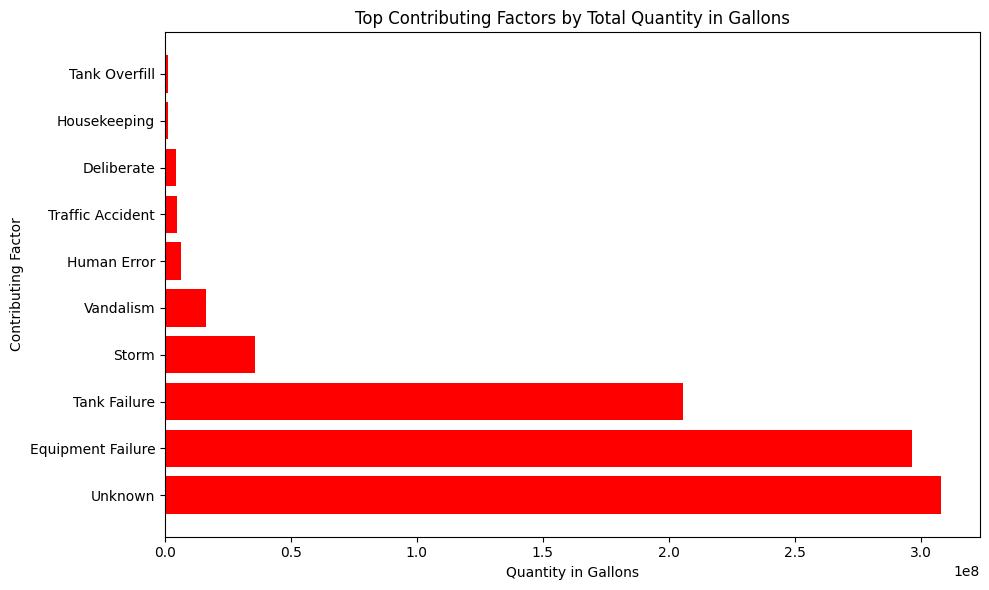

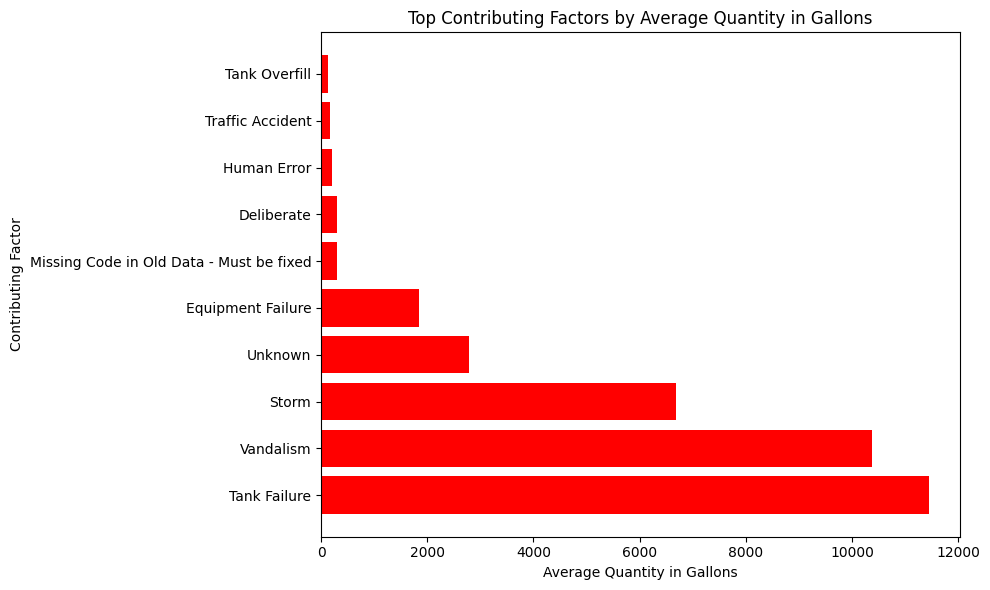

In [8]:
create_plot(gallons_data_cleaned)
create_average_plot(gallons_average_data_cleaned)